  Gender  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  Shell Weight  \
0      M   0.455     0.365   0.095         0.514           0.225           0.101         0.150   
1      M   0.350     0.265   0.090         0.226           0.100           0.049         0.070   
2      F   0.530     0.420   0.135         0.677           0.257           0.141         0.210   
3      M   0.440     0.365   0.125         0.516           0.215           0.114         0.155   
4      I   0.330     0.255   0.080         0.205           0.089           0.040         0.055   
5      I   0.425     0.300   0.095         0.351           0.141           0.077         0.120   
6      F   0.530     0.415   0.150         0.777           0.237           0.141         0.330   
7      F   0.545     0.425   0.125         0.768           0.294           0.149         0.260   
8      M   0.475     0.370   0.125         0.509           0.216           0.113         0.165   
9      F   0.550    

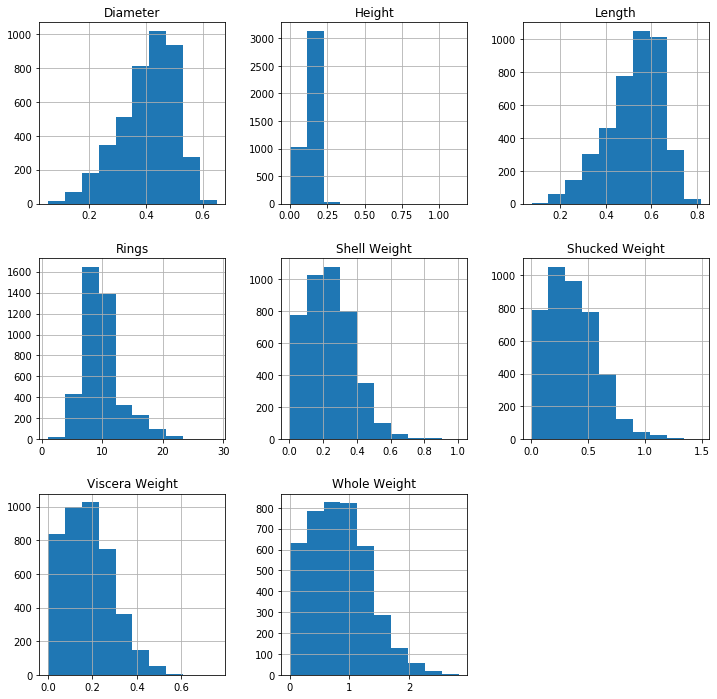

---------------------------------------------------------------------------------------------------- 
 **************************************************************************************************** 
 ----------------------------------------------------------------------------------------------------
Accuracy: 53.08%
Öznitelik Sayısı: 8
Seçilen Öznitelikler :[ True  True  True  True  True  True  True  True]
['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
Öznitelik Sıralaması: [1 1 1 1 1 1 1 1]
Test verisi için Accuracy: 96.81%
Eğitim verisi için Accuracy: 95.25%
model test matrisi : 
 [[409   4  18]
 [  2 430   2]
 [  5  13 496]]


In [45]:
#xboost modülünü yükleyip kullanmak için import ediyoruz
#!pip install xgboost
import xgboost
#Kodumuzda kullanacağımız bütün modülleri import ediyoruz
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from pandas import set_option
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
#Veri setimizde sütun değerleri girilmediği için manuel olarak sütun değerlerini giriyoruz
columnNames = ["Gender","Length","Diameter","Height","Whole Weight","Shucked Weight","Viscera Weight","Shell Weight","Rings"]
otherCols=["Length","Diameter","Height","Whole Weight","Shucked Weight","Viscera Weight","Shell Weight","Rings"]
df = pd.read_csv("abalone.data",names = columnNames)
#Hedef değişkenimiz olan cinsiyet ile diğer sütunlerı ayırıyoruz
X=df[otherCols]
Y=df["Gender"]
#Veriye bir göz atmak için dataframemimizi head() fonkisyonu ile peek değişkenine aktarıp peeki yazdırıyoruz
peek = df.head(10)
print(peek)
#İki tablomuzun arasına birbirlerine karıştırmamızı engellemek amacıyla bir çizgi çekiyoruz
print("-"*100,"\n","*"*100,"\n","-"*100)
#Verimizde eksik veri olup olmadığını kontrol ediyoruz
print(df.isnull().sum())
print("-"*100,"\n","*"*100,"\n","-"*100)
#Verimize biraz göz atıp amacımızı anladıktan sonra verimizi istatistiksel olarak inceliyoruz
set_option("display.width",100)
set_option("precision",3)
description = df.describe()
print(description)
print("-"*100,"\n","*"*100,"\n","-"*100)
#Verimizin kolerasyonlarını inceleyerek yüksek kolerasyonlu değişkenleri tespit etmeye çalışıyoruz
set_option("display.width",100)
set_option("precision",3)
corr = df.corr(method="pearson")
print(corr)
print("-"*100,"\n","*"*100,"\n","-"*100)
#Verimizi grafikler üzerinden inceleyip daha iyi anlamaya çalışıyoruz
df.hist(figsize=(12,12))
plt.show()
print("-"*100,"\n","*"*100,"\n","-"*100)






#Verimizi test ve train verisi olmak üzere bölüyoruz test_size = 0.33 diyerek verimizin %33ü test verisi olarak seçiyoruz
#Kullanılacak olan verimizi random_state = 1 diyerek veri setimizden rastgele seçilmesini istiyoruz
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=1)
#XGBoost modelimizi train verilirimiz ile kurup model değişkenimize aktarıyoruz
model = XGBClassifier().fit(X_train, y_train)
#Modelimizin X_test verilirimizi tahmin etmesini sağlıyoruz tahminleri y_pred adlı değişkenimize aktarıyoruz
y_pred = model.predict(X_test)
#Makinemizin tahmin ettiği y_pred ile y_test verilerimizi kıyaslayıp bir skor üretiyoruz
accuracy = accuracy_score(y_test, y_pred)
#Skorumuzu ekrana yazdırıyoruz
print("Accuracy: %.2f%%" % (accuracy * 100.0))









rfe=RFE(model,8)
fit=rfe.fit(X,Y)
print("Öznitelik Sayısı: %d" %fit.n_features_)
print("Seçilen Öznitelikler :%s" %fit.support_)
print(otherCols)
print("Öznitelik Sıralaması: %s" %fit.ranking_)
y_pred1=fit.predict(X_test)
y_pred_train=fit.predict(X_train)
accuracy1 = accuracy_score(y_test, y_pred1)
#Skorumuzu ekrana yazdırıyoruz
print("Test verisi için Accuracy: %.2f%%" % (accuracy1 * 100.0))
accuracy2 = accuracy_score(y_train, y_pred_train)
#Skorumuzu ekrana yazdırıyoruz
print("Eğitim verisi için Accuracy: %.2f%%" % (accuracy2 * 100.0))
print("model test matrisi : \n",confusion_matrix(y_test,y_pred1))